In [54]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

%run -i helpers.py

In [55]:
# SVM
# ---

def SVM(x, y):
    
    n = len(x)
    
    # Objective function (0.5 x^t P x + q^t x)
    P = np.zeros( (n, n) )
    for i in range(n):
        for j in range(n):
            P[i,j] = y[i] * y[j] * np.dot(x[i], x[j])
    q = np.full(n, -1.)

    # Equality constraint (A x = b)
    A = y.copy().reshape( (1, 100) )
    b = np.zeros( (1, 1) )

    # Inequality constraint (G x <= b)
    G = -np.eye(n)
    h = np.zeros(n)
    
    # Solve for 'alpha's (Quadratic programming)
    alpha = cvxopt_solve_qp(P, q, G, h, A, b)
    
    # Solve for 'w'
    w = np.zeros(2)
    for i in range(n):
        w += alpha[i] * y[i] * x[i]

    # Solve for 'b'
    support_vectors_idx = np.argwhere(alpha > 1e-3).ravel()
    sv_idx = support_vectors_idx[0]
    b = y[sv_idx] - np.dot(w.T, x[sv_idx])
    
    return alpha, w, b

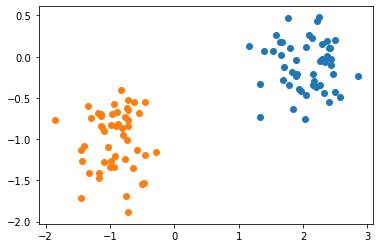

In [56]:
# SAMPLING
# --------

# Parameters
N_1 = 50
MU_1 = [2.0, -0.1]
SIGMA_1 = [[0.1, 0.0],
           [0.0, 0.1]]
N_2 = 50
MU_2 = [-1.0, -1.0]
SIGMA_2 = [[0.1, 0.0],
           [0.0, 0.1]]

# Sample
X_1 = np.random.multivariate_normal(MU_1, SIGMA_1, N_1)
X_2 = np.random.multivariate_normal(MU_2, SIGMA_2, N_2)

# Unify
X = np.vstack( (X_1, X_2) )
Y = np.array([1] * N_1 + [-1] * N_2)

# Plot
plt.scatter(X_1[:,0], X_1[:,1], c='tab:blue')
plt.scatter(X_2[:,0], X_2[:,1], c='tab:orange')
plt.show()

     pcost       dcost       gap    pres   dres
 0: -4.7512e+00 -8.0022e+00  2e+02  1e+01  2e+00
 1: -2.1320e+00 -1.6981e+00  2e+01  1e+00  1e-01
 2: -1.4654e-01 -1.2285e+00  1e+00  5e-16  1e-15
 3: -4.4919e-01 -7.2853e-01  3e-01  4e-16  6e-16
 4: -5.4083e-01 -7.4184e-01  2e-01  4e-16  4e-16
 5: -6.9889e-01 -7.1685e-01  2e-02  3e-16  5e-16
 6: -7.1123e-01 -7.1143e-01  2e-04  2e-16  6e-16
 7: -7.1138e-01 -7.1138e-01  2e-06  2e-16  6e-16
 8: -7.1138e-01 -7.1138e-01  2e-08  2e-16  5e-16
Optimal solution found.


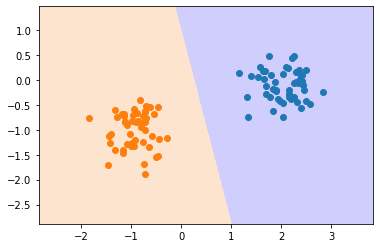

In [57]:
# RUN
# ---

alpha, w, b = SVM(X, Y)

nx = 500
ny = 500

xx, yy = np.meshgrid(np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, nx),
                     np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, ny))
Z = np.empty(xx.shape)
for iy in range(ny):
    for ix in range(nx):
        x = xx[iy, ix]
        y = yy[iy, ix]
        decision_func = x * w[0] + y * w[1] + b
        Z[iy, ix] = 2 if decision_func >= 0 else 1

cm = LinearSegmentedColormap.from_list('binary', [(1,0.9,0.8), (0.8,0.8,1)])

plt.contourf(xx, yy, Z, cmap=cm)
plt.scatter(X_1[:,0], X_1[:,1], c='tab:blue')
plt.scatter(X_2[:,0], X_2[:,1], c='tab:orange')
plt.show()